In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv("laptop_details.csv")

In [130]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [131]:
df['Brand'] = df['Product'].apply(lambda x:" ".join(x.split()[0:1]))

In [132]:
df['Ram'] = df['Product'].str.findall(r'(\d+\sGB)').apply(lambda x:x[0])

In [133]:
df['Processor'] = df['Feature'].apply(lambda x:re.compile(r'(?:Intel|AMD|Apple|Qualcomm)[\sa-zA-Z0-9]{0,25}\sProcessor').findall(x))

In [134]:
df['Storage'] = df['Product'].apply(lambda x:re.compile(r'[0-9\s]+(?:GB|TB)\s(?:HDD|SSD|EMMC)').findall(x))

In [135]:
df['Screen Size'] = df['Feature'].str.findall(r'(\d+.\d+)\scm').apply(lambda x:x[0])

In [136]:
df['Operating System'] = df['Feature'].str.findall(r'(\S+\s\S+)\sOperating').apply(lambda x:x[0])

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    object 
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Ram               720 non-null    object 
 6   Processor         720 non-null    object 
 7   Storage           720 non-null    object 
 8   Screen Size       720 non-null    object 
 9   Operating System  720 non-null    object 
dtypes: float64(1), object(9)
memory usage: 56.4+ KB


In [138]:
df['Processor'] = df['Processor'].astype('str')

In [139]:
df['Processor'] = df['Processor'].str.replace('[','')

In [140]:
df['Processor'] = df['Processor'].str.replace(']','')

In [141]:
df['Processor'] = df['Processor'].str.replace("'",'')

In [142]:
df.head()

,Product,Rating,MRP,Feature,Brand,Ram,Processor,Storage,Screen Size,Operating System
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,Intel Core i3 Processor,[256 GB SSD],35.56,Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,Intel Core i3 Processor,[512 GB SSD],39.62,Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,Intel Core i3 Processor,[512 GB SSD],39.62,Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB,AMD Ryzen 5 Hexa Core Processor,[512 GB SSD],39.62,Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,Intel Core i5 Processor,[512 GB SSD],39.62,RAMWindows 11


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    object 
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Ram               720 non-null    object 
 6   Processor         720 non-null    object 
 7   Storage           720 non-null    object 
 8   Screen Size       720 non-null    object 
 9   Operating System  720 non-null    object 
dtypes: float64(1), object(9)
memory usage: 56.4+ KB


In [144]:
df["Ram"]=df["Ram"].str.replace("GB","")

In [145]:
df["Ram"]=df["Ram"].astype("int")

In [146]:
df['Screen Size'] = df['Screen Size'].astype('float')

In [147]:
df['Operating System'].value_counts()

Windows 11          405
RAMWindows 11       156
Windows 10          117
RAMMac OS            19
RAMWindows 10        12
LPDDR4 RAMChrome      4
LPDDR4 RAMDOS         2
DDR4 RAMChrome        2
bit DOS               2
bit Chrome            1
Name: Operating System, dtype: int64

In [148]:
df['Operating System'] = df['Operating System'].str.replace('RAM','')

In [149]:
df['Operating System'] = df['Operating System'].str.replace('LPDDR4','')

In [150]:
df['Operating System'] = df['Operating System'].str.replace('DDR4','')

In [151]:
df['Operating System'] = df['Operating System'].str.replace('bit','')

In [152]:
df['Operating System'] = df['Operating System'].str.strip()

In [153]:
df['Storage'] = df['Storage'].astype('str')

In [154]:
df['Storage'] = df['Storage'].str.replace("[",'')

In [155]:
df['Storage'] = df['Storage'].str.replace("]",'')

In [156]:
df['Storage'] = df['Storage'].str.replace("'",'')

In [157]:
df['Storage'] = df['Storage'].str.replace("[",'')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    object 
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Ram               720 non-null    int32  
 6   Processor         720 non-null    object 
 7   Storage           720 non-null    object 
 8   Screen Size       720 non-null    float64
 9   Operating System  720 non-null    object 
dtypes: float64(2), int32(1), object(7)
memory usage: 53.6+ KB


In [159]:
df['Storage'].value_counts()

512 GB SSD                375
1 TB SSD                  176
256 GB SSD                 98
1 TB HDD, 256 GB SSD       26
1 TB HDD                   17
64 GB EMMC                  7
2 TB SSD                    7
128 GB SSD                  6
128 GB EMMC                 2
1 TB HDD, 512 GB SSD        2
1 TB HDD, 128 GB SSD        2
256 GB HDD, 256 GB SSD      1
32 GB EMMC                  1
Name: Storage, dtype: int64

In [160]:
df['Price'] = df['MRP']

In [161]:
df.drop(columns = 'MRP', inplace= True)

In [162]:
df['Price'] = df['Price'].str.replace('₹','')

In [163]:
df['Price'] = df['Price'].str.replace(',','')

In [164]:
df['Price'] = df['Price'].astype(int)

In [165]:
df.head()

,Product,Rating,Feature,Brand,Ram,Processor,Storage,Screen Size,Operating System,Price
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,Intel Core i3 Processor,256 GB SSD,35.56,Windows 11,36990
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8,Intel Core i3 Processor,512 GB SSD,39.62,Windows 11,39990
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,Intel Core i3 Processor,512 GB SSD,39.62,Windows 11,32990
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8,AMD Ryzen 5 Hexa Core Processor,512 GB SSD,39.62,Windows 10,49990
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8,Intel Core i5 Processor,512 GB SSD,39.62,Windows 11,49990


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   Feature           720 non-null    object 
 3   Brand             720 non-null    object 
 4   Ram               720 non-null    int32  
 5   Processor         720 non-null    object 
 6   Storage           720 non-null    object 
 7   Screen Size       720 non-null    float64
 8   Operating System  720 non-null    object 
 9   Price             720 non-null    int32  
dtypes: float64(2), int32(2), object(6)
memory usage: 50.8+ KB


In [167]:
df.drop(columns = ['Product','Feature','Rating'], inplace= True)

In [168]:
df.to_csv("cleaned_laptop_details.csv")


<Axes: xlabel='Price', ylabel='Density'>

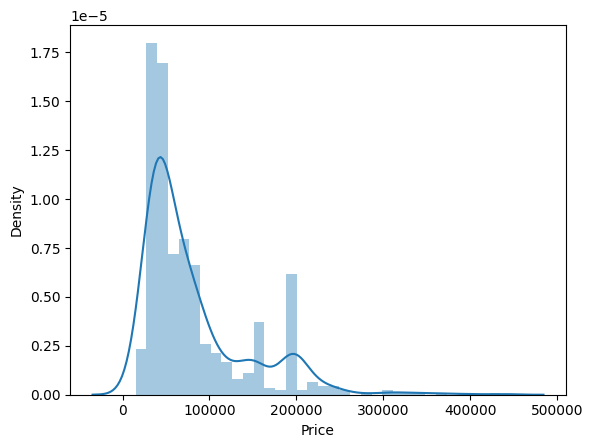

In [169]:
sns.distplot(df["Price"])

<Axes: ylabel='Frequency'>

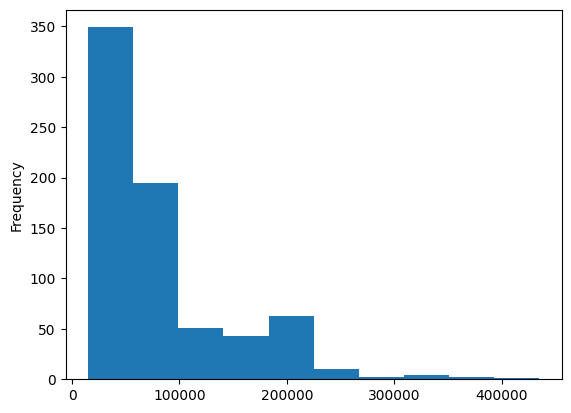

In [170]:
df['Price'].plot(kind='hist')

<Axes: >

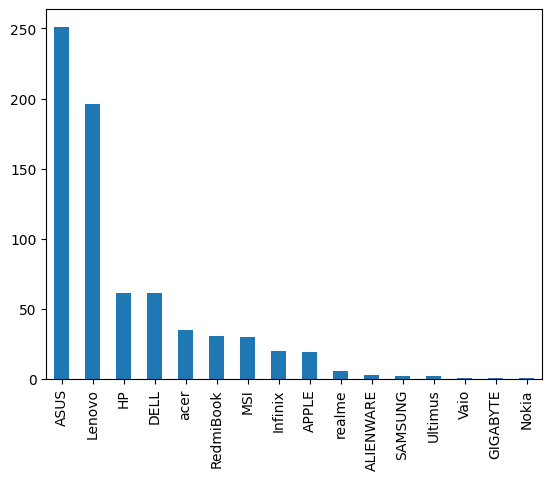

In [171]:
df["Brand"].value_counts().plot(kind="bar")

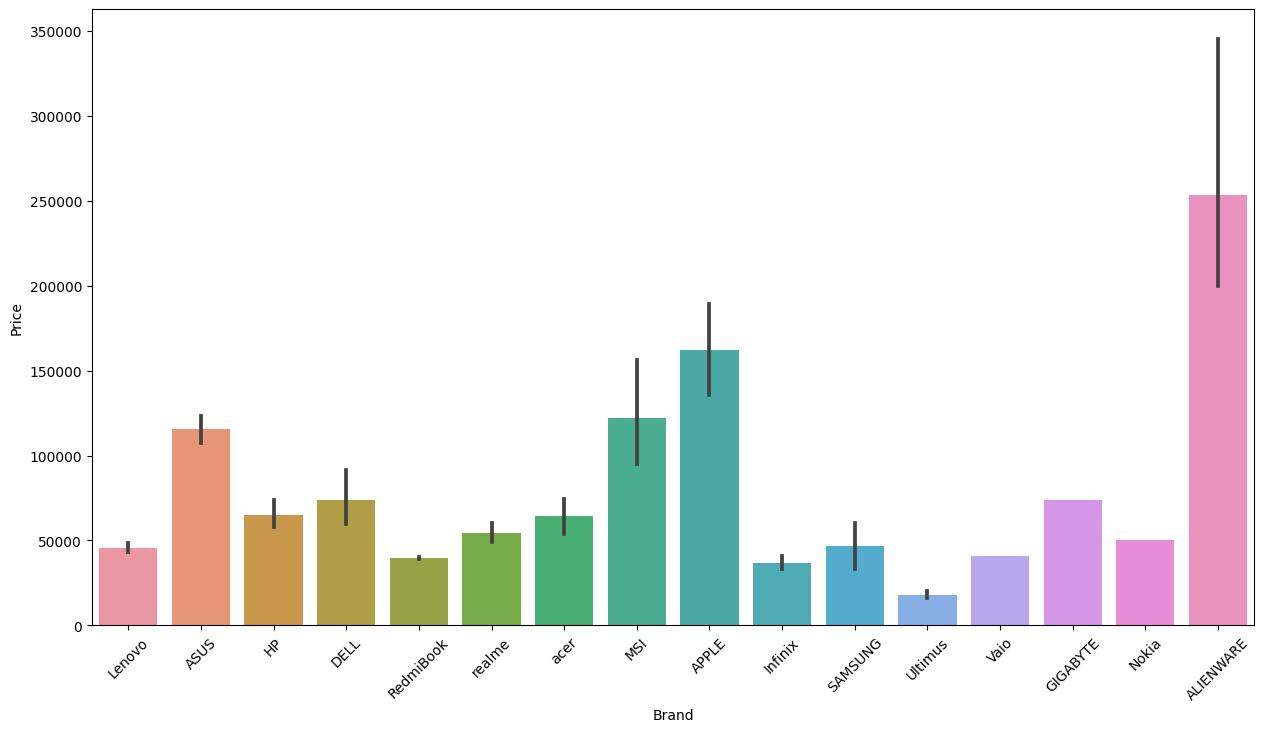

In [172]:
plt.figure(figsize=(15,8))
sns.barplot(x=df["Brand"],y=df["Price"])
plt.xticks(rotation=45)
plt.show()

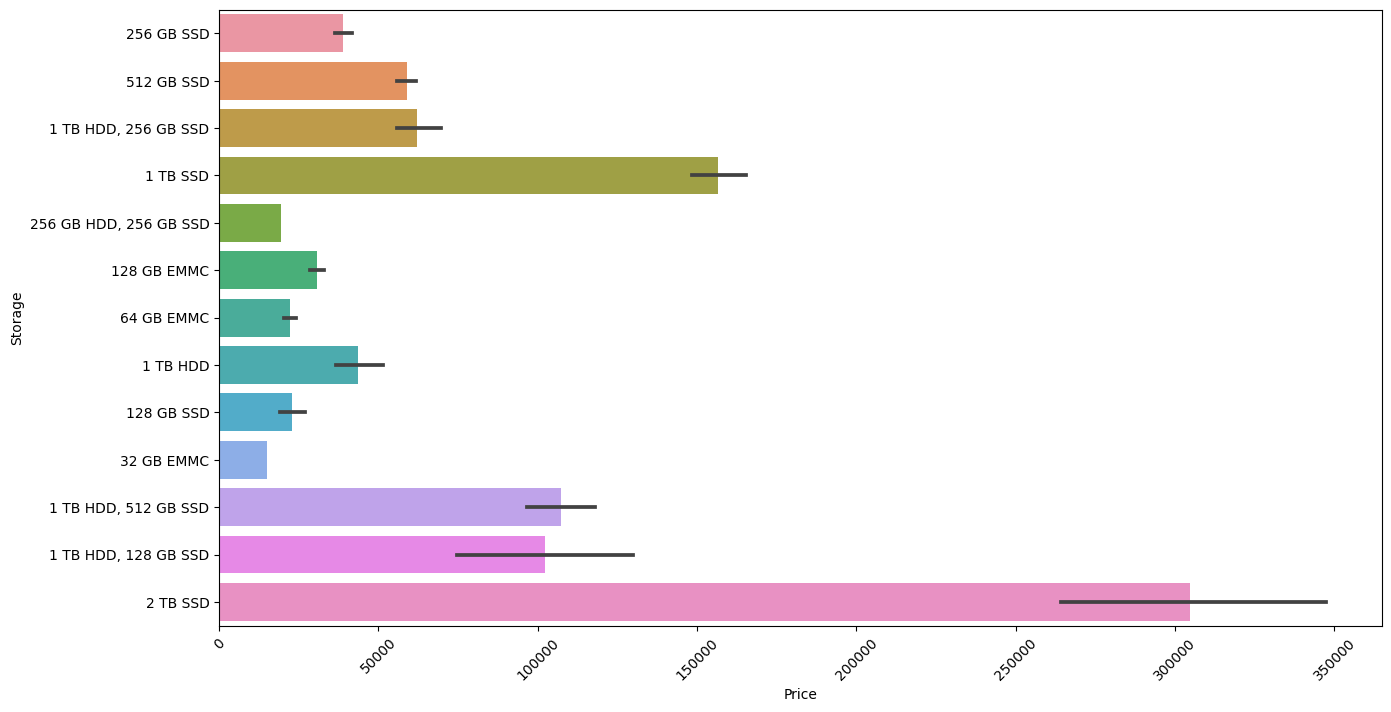

In [173]:
plt.figure(figsize=(15,8))
sns.barplot(x=df["Price"],y=df["Storage"])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Screen Size', ylabel='Price'>

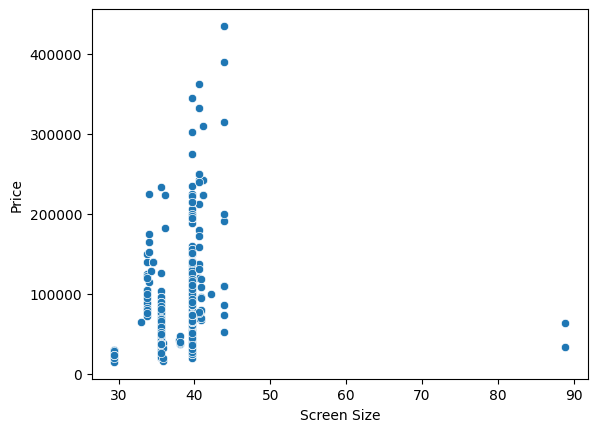

In [174]:
sns.scatterplot(x='Screen Size',y='Price',data=df)

<Axes: >

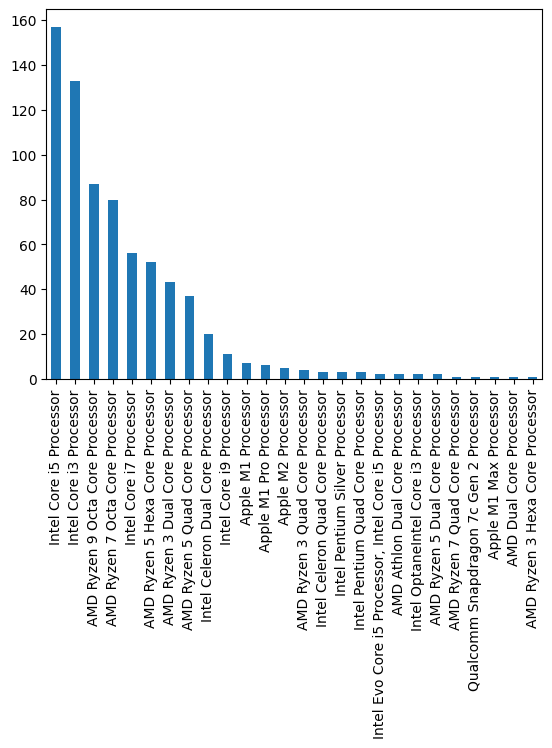

In [175]:
df["Processor"].value_counts().plot(kind="bar")

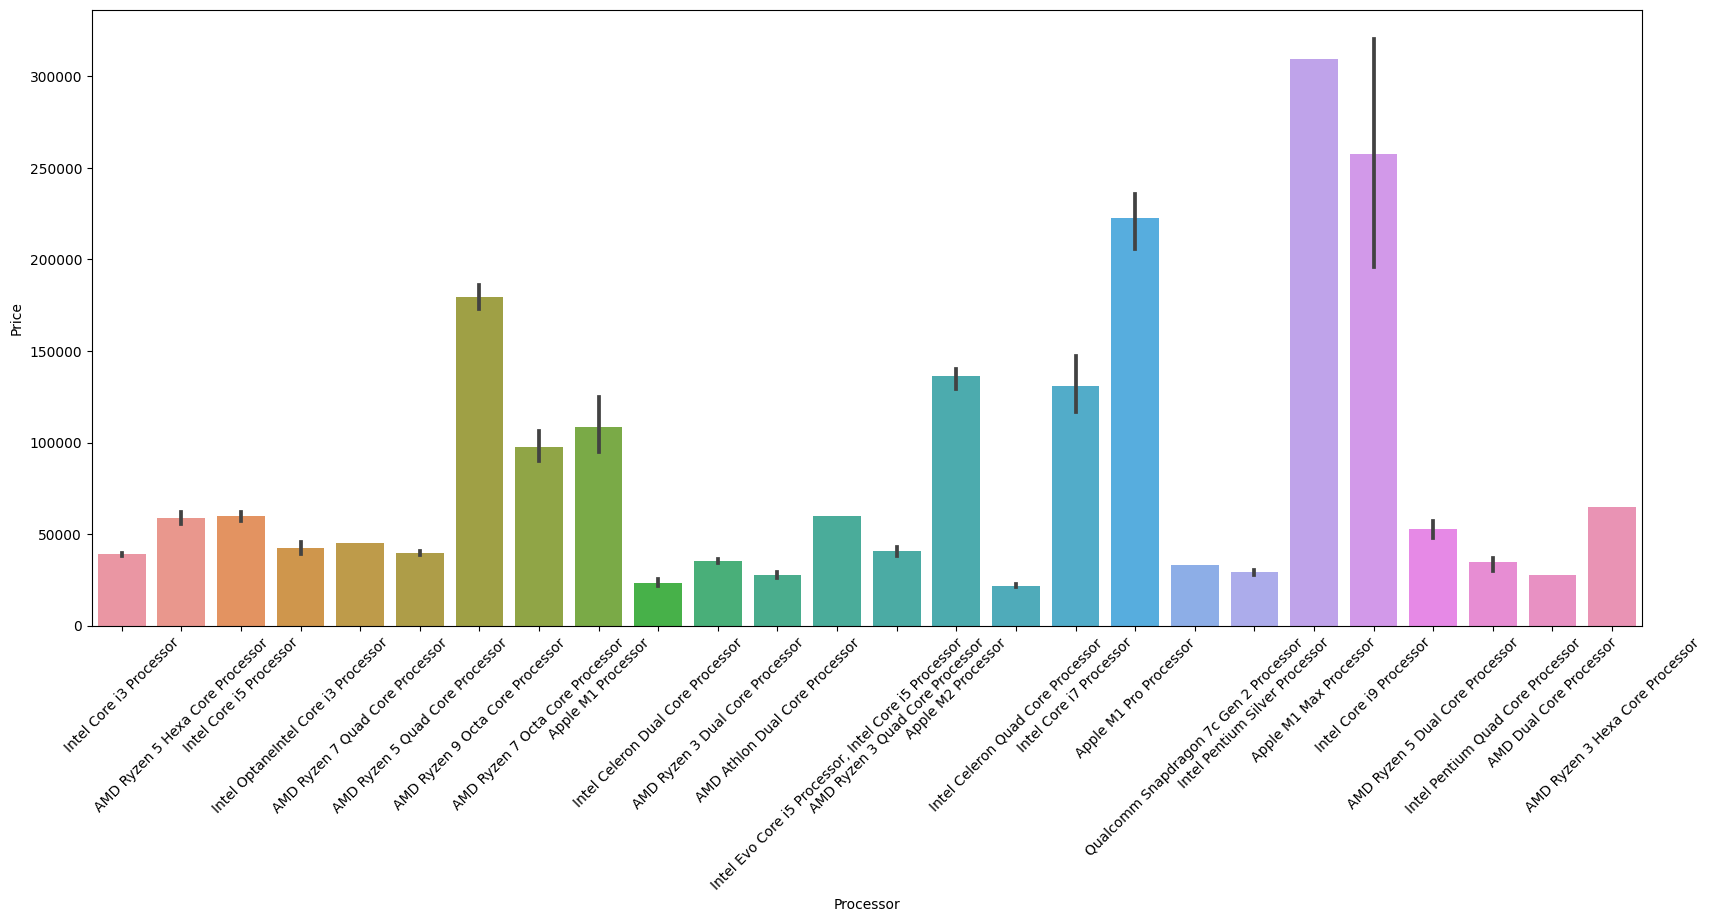

In [176]:
plt.figure(figsize=(20,8))
sns.barplot(x=df["Processor"],y=df["Price"])
plt.xticks(rotation=45)
plt.show()

In [177]:
df.corr()['Price']

Ram            0.805204
Screen Size    0.146699
Price          1.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

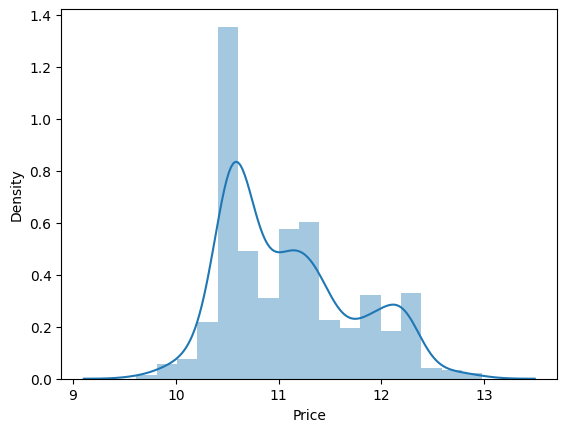

In [178]:
sns.distplot(np.log(df['Price']))

<Axes: xlabel='Price', ylabel='Density'>

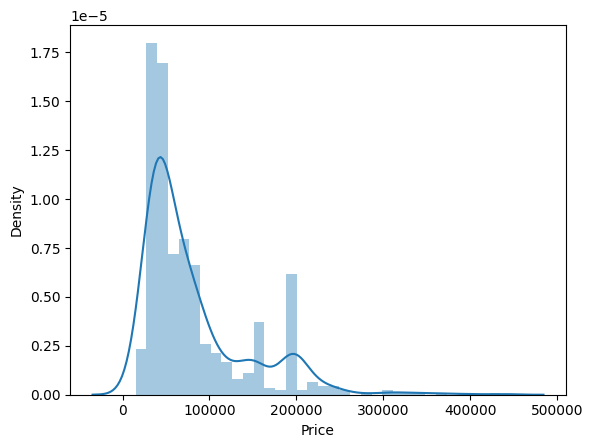

In [179]:
sns.distplot(df['Price'])

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             720 non-null    object 
 1   Ram               720 non-null    int32  
 2   Processor         720 non-null    object 
 3   Storage           720 non-null    object 
 4   Screen Size       720 non-null    float64
 5   Operating System  720 non-null    object 
 6   Price             720 non-null    int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 33.9+ KB


In [181]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

<h1>Linear regression</h1>

In [183]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown = "ignore",sparse=False),[0,2,3,5])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9432366186147745
MAE 0.12078238148567978


<h1>KNN</h1>

In [184]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown = "ignore",sparse=False),[0,2,3,5])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9176413773309321
MAE 0.1168167456987978


<h1>Decision Tree</h1>

In [185]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown = "ignore",sparse=False),[0,2,3,5])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9198573633931855
MAE 0.12036212203816732


<h1>SVM</h1>

In [186]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown = "ignore",sparse=False),[0,2,3,5])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9353583935351506
MAE 0.11475547685481677


<h1>Random Forest</h1>

In [187]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown = "ignore",sparse=False),[0,2,3,5])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9422225763171572
MAE 0.10837678412239794


<h1>Observations</h1>
<h3>Random Forest Model gives the best R2 score</h3>
<h5>R2 score 0.9531465674900533</h5>
<h5>MAE is 0.10837678412239794
 </h5>

<h1>Exporting the Model</h1>

In [188]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [189]:
df.head()

,Brand,Ram,Processor,Storage,Screen Size,Operating System,Price
0,Lenovo,8,Intel Core i3 Processor,256 GB SSD,35.56,Windows 11,36990
1,Lenovo,8,Intel Core i3 Processor,512 GB SSD,39.62,Windows 11,39990
2,ASUS,8,Intel Core i3 Processor,512 GB SSD,39.62,Windows 11,32990
3,HP,8,AMD Ryzen 5 Hexa Core Processor,512 GB SSD,39.62,Windows 10,49990
4,ASUS,8,Intel Core i5 Processor,512 GB SSD,39.62,Windows 11,49990


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             720 non-null    object 
 1   Ram               720 non-null    int32  
 2   Processor         720 non-null    object 
 3   Storage           720 non-null    object 
 4   Screen Size       720 non-null    float64
 5   Operating System  720 non-null    object 
 6   Price             720 non-null    int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 33.9+ KB
